# Data Import and Setup
Import necessary libraries (pandas, numpy, matplotlib, seaborn) and load the YOLO training results from CSV.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the YOLO training results from CSV
file_path = '../models/emergency-vehicle-detection/results.csv'
results_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to ensure it's loaded correctly
results_df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,76.3517,3.08268,3.97129,4.24510,0.00271,0.79612,0.00469,0.00183,2.52596,4.05359,4.15674,0.003285,0.003285,0.003285
1,2,144.9030,2.97806,3.54083,3.97840,0.00513,0.04538,0.01243,0.00361,2.64730,6.56647,4.05853,0.006586,0.006586,0.006586
2,3,213.6280,2.23007,2.55378,3.06460,0.13454,0.22616,0.17779,0.07967,1.83531,4.65328,2.89106,0.009853,0.009853,0.009853
3,4,282.2940,1.60572,1.86429,2.33260,0.44808,0.58743,0.48652,0.24866,1.69491,2.57751,2.72272,0.009851,0.009851,0.009851
4,5,350.5910,1.35514,1.50266,2.03592,0.77075,0.70581,0.77011,0.49414,1.32043,1.38213,2.21910,0.009802,0.009802,0.009802


# Data Preprocessing and Exploration
Examine the CSV structure, handle any missing values, and display summary statistics of the training data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 122 non-null    int64  
 1   time                  122 non-null    float64
 2   train/box_loss        122 non-null    float64
 3   train/cls_loss        122 non-null    float64
 4   train/dfl_loss        122 non-null    float64
 5   metrics/precision(B)  122 non-null    float64
 6   metrics/recall(B)     122 non-null    float64
 7   metrics/mAP50(B)      122 non-null    float64
 8   metrics/mAP50-95(B)   122 non-null    float64
 9   val/box_loss          122 non-null    float64
 10  val/cls_loss          122 non-null    float64
 11  val/dfl_loss          122 non-null    float64
 12  lr/pg0                122 non-null    float64
 13  lr/pg1                122 non-null    float64
 14  lr/pg2                122 non-null    float64
dtypes: float64(14), int64(1

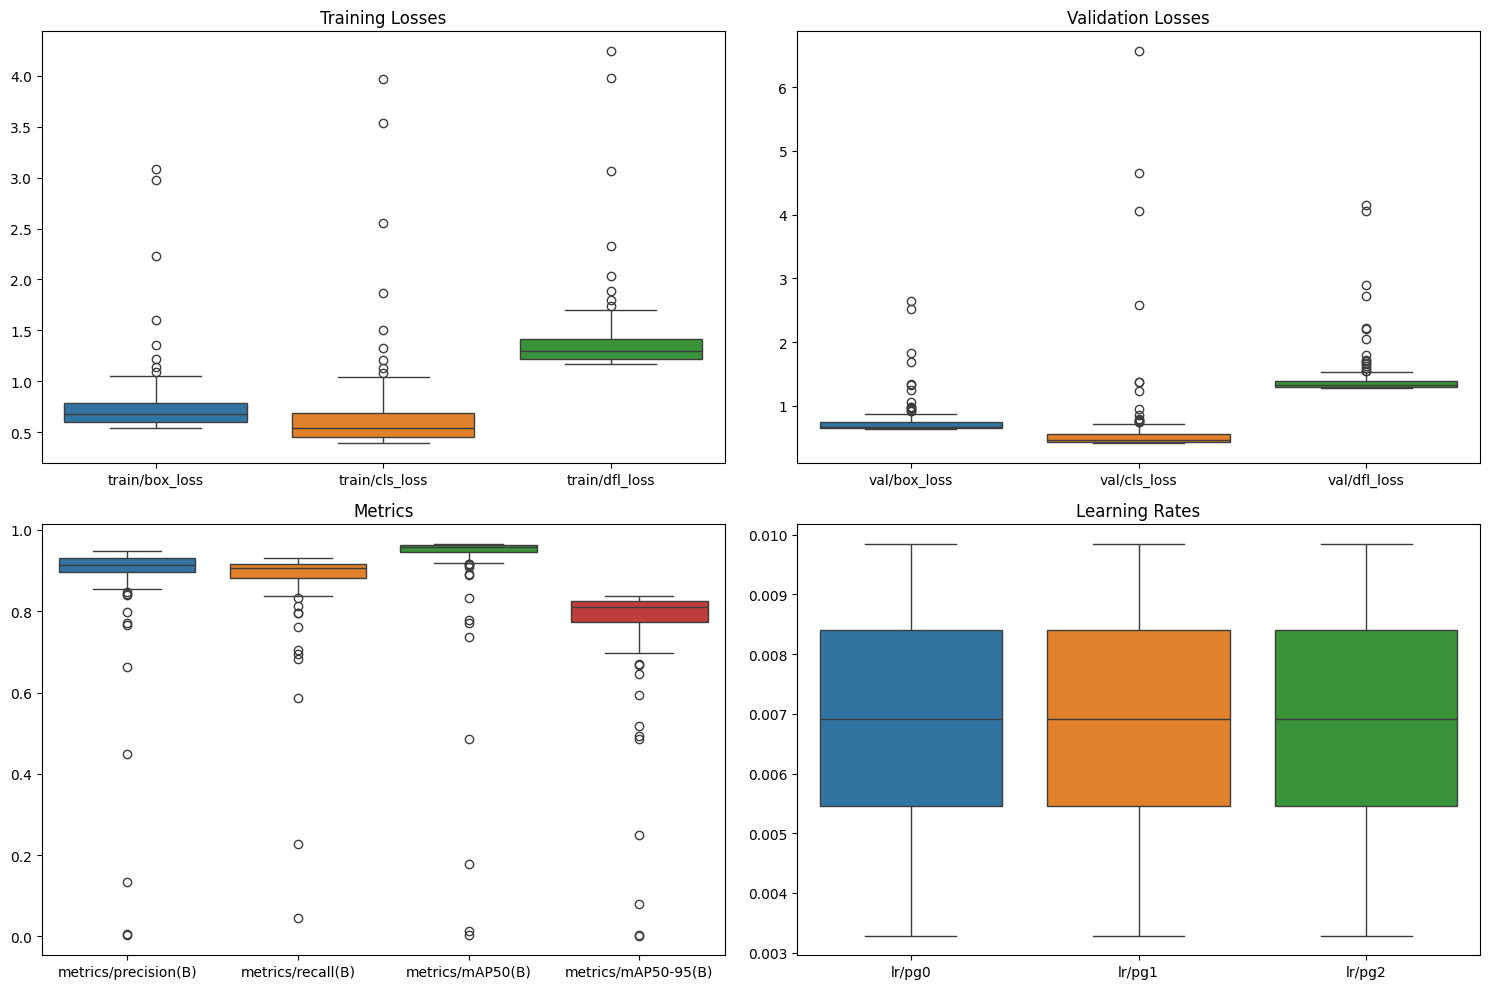

In [2]:
# Examine the CSV structure
results_df.info()

# Handle any missing values
# Check for missing values
missing_values = results_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with the mean of the column
results_df.fillna(results_df.mean(), inplace=True)

# Display summary statistics of the training data
summary_statistics = results_df.describe()
print("Summary statistics of the training data:\n", summary_statistics)

# Visualize the distribution of losses and metrics
plt.figure(figsize=(15, 10))

# Box plot for training losses
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df[['train/box_loss', 'train/cls_loss', 'train/dfl_loss']])
plt.title('Training Losses')

# Box plot for validation losses
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df[['val/box_loss', 'val/cls_loss', 'val/dfl_loss']])
plt.title('Validation Losses')

# Box plot for metrics
plt.subplot(2, 2, 3)
sns.boxplot(data=results_df[['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']])
plt.title('Metrics')

# Box plot for learning rates
plt.subplot(2, 2, 4)
sns.boxplot(data=results_df[['lr/pg0', 'lr/pg1', 'lr/pg2']])
plt.title('Learning Rates')

plt.tight_layout()
plt.show()

# Training Performance Analysis
Analyze training time per epoch and create visualizations showing how the training progressed over time.

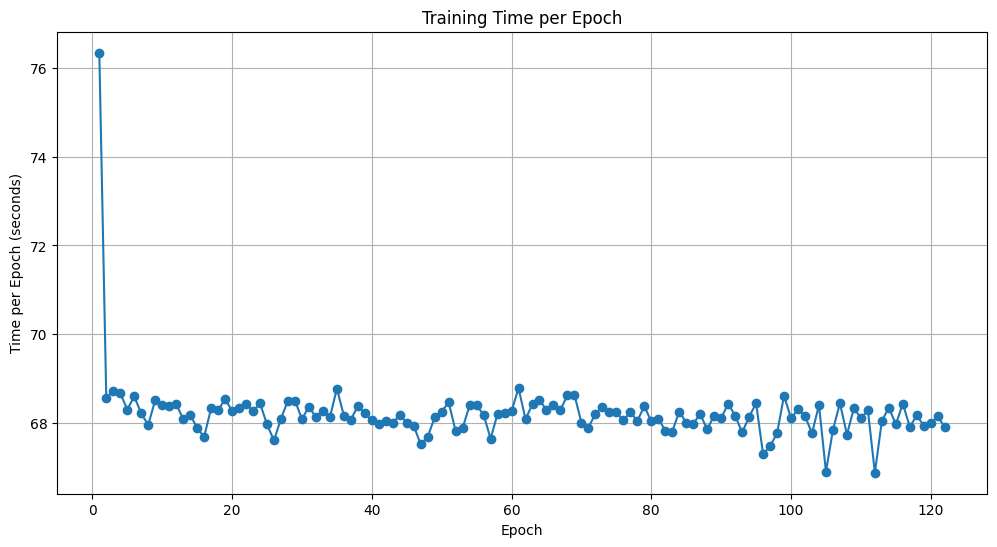

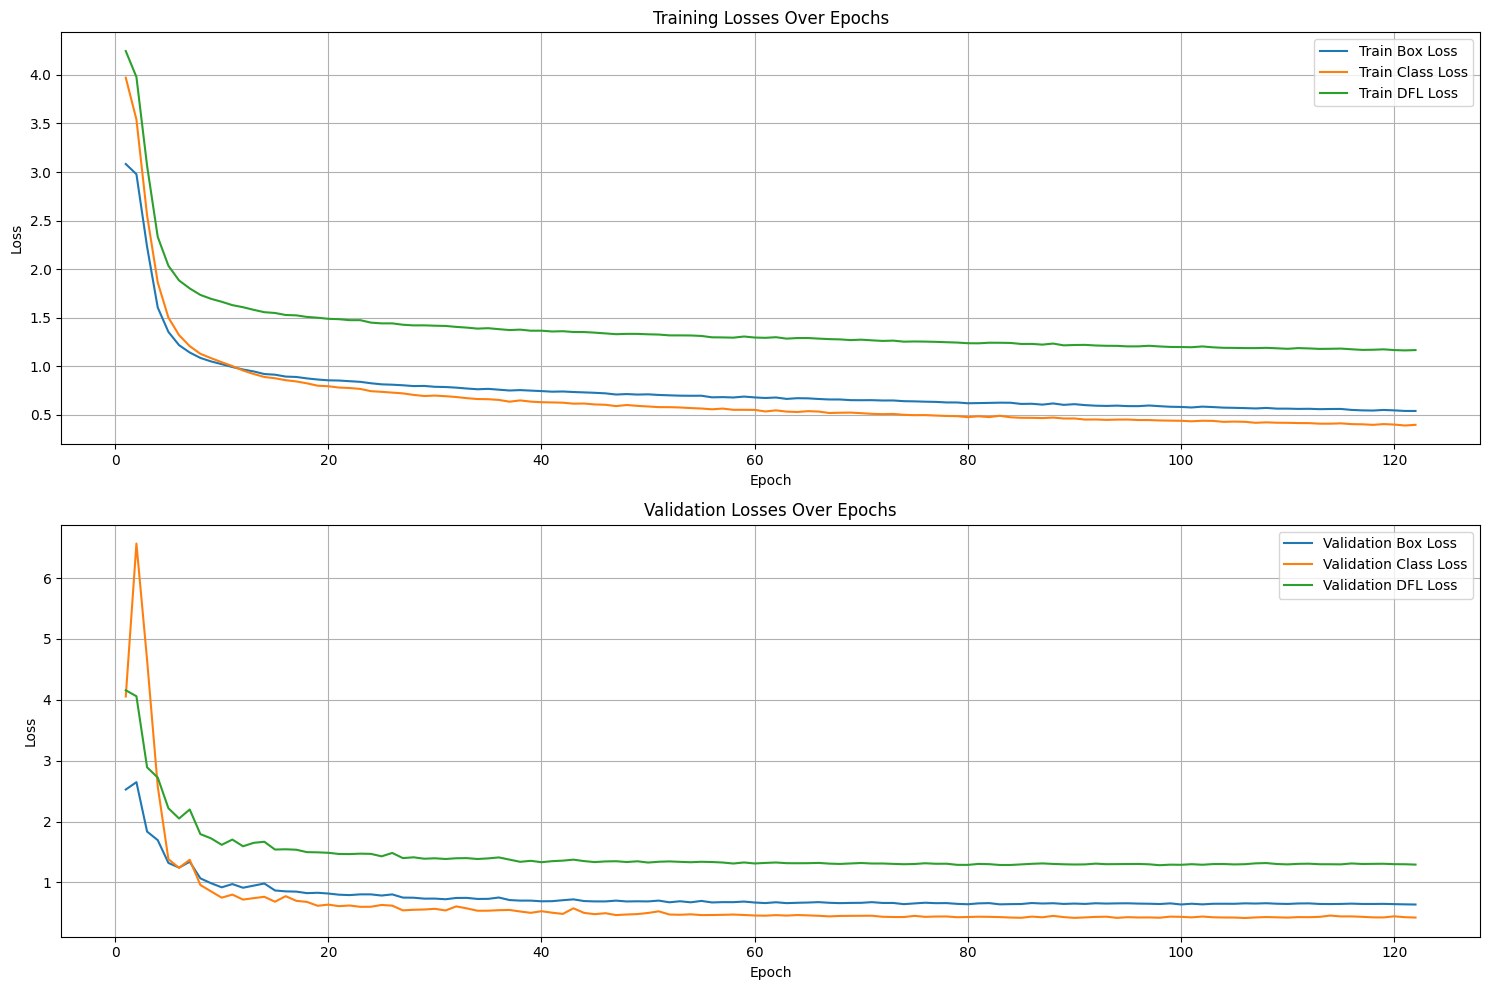

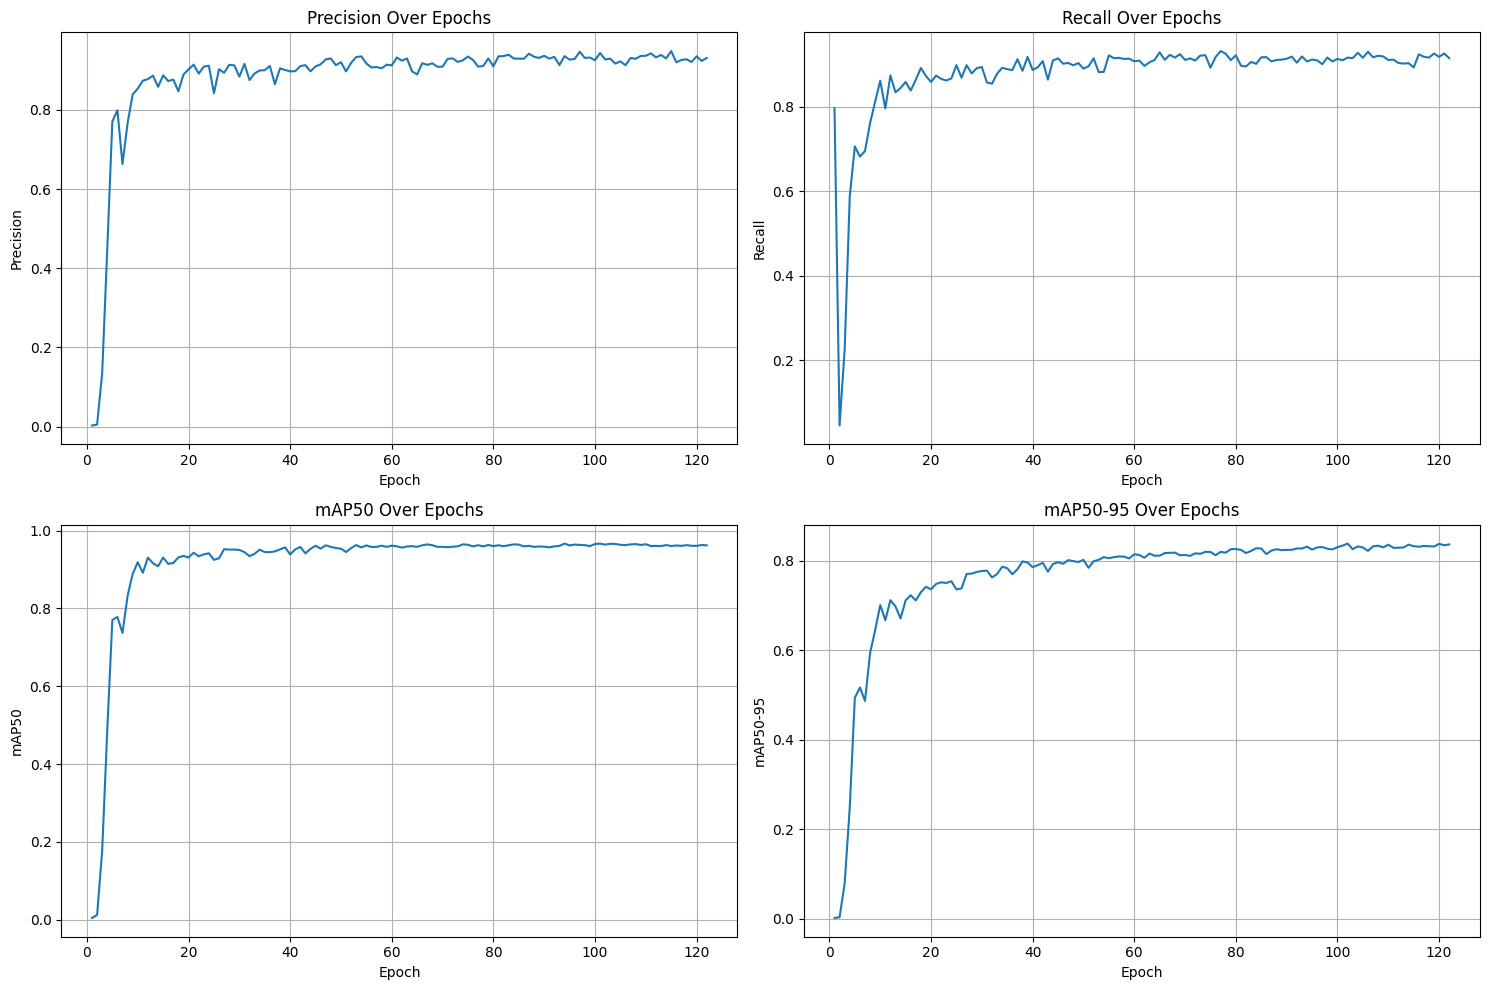

In [3]:
# Training Performance Analysis

# Calculate training time per epoch
results_df['time_per_epoch'] = results_df['time'].diff().fillna(results_df['time'])

# Plot training time per epoch
plt.figure(figsize=(12, 6))
plt.plot(results_df['epoch'], results_df['time_per_epoch'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Time per Epoch (seconds)')
plt.title('Training Time per Epoch')
plt.grid(True)
plt.show()

# Plot training and validation losses over epochs
plt.figure(figsize=(15, 10))

# Training losses
plt.subplot(2, 1, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss')
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='Train DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.grid(True)

# Validation losses
plt.subplot(2, 1, 2)
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Class Loss')
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], label='Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Losses Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot metrics over epochs
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision Over Epochs')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('mAP50 Over Epochs')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Over Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()

# Loss Visualization
Create line plots to visualize the different loss components (box_loss, cls_loss, dfl_loss) for both training and validation sets over epochs.

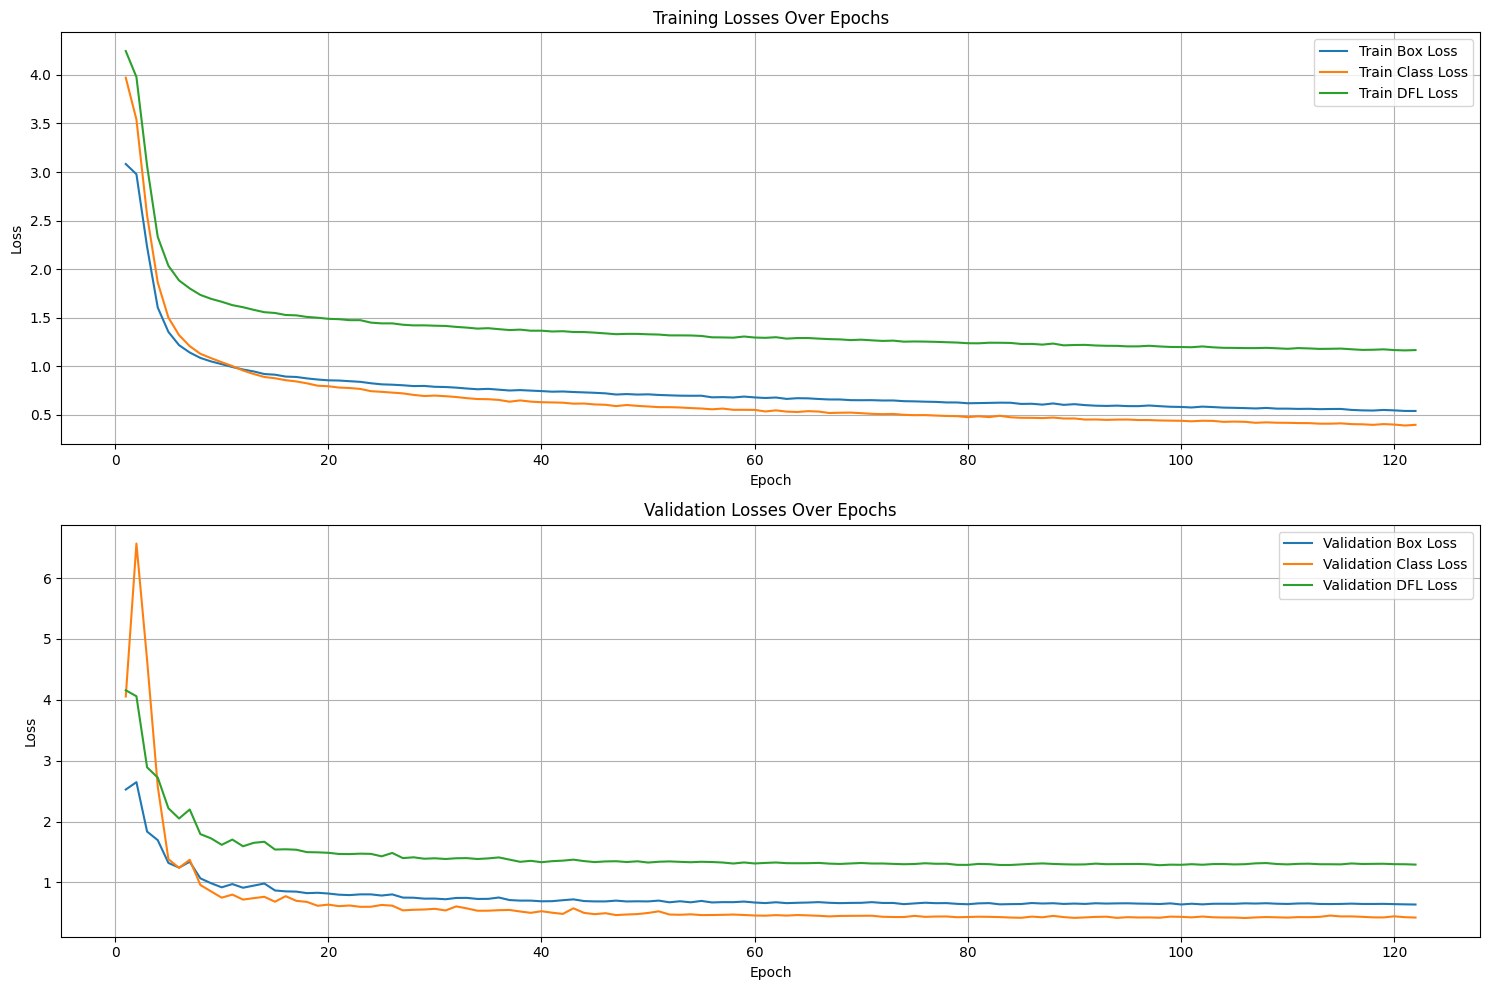

In [4]:
# Loss Visualization

# Create line plots to visualize the different loss components (box_loss, cls_loss, dfl_loss) for both training and validation sets over epochs

plt.figure(figsize=(15, 10))

# Training losses
plt.subplot(2, 1, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss')
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='Train DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.grid(True)

# Validation losses
plt.subplot(2, 1, 2)
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Class Loss')
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], label='Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Losses Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Metrics Visualization
Visualize model performance metrics including precision, recall, mAP50, and mAP50-95 across training epochs.

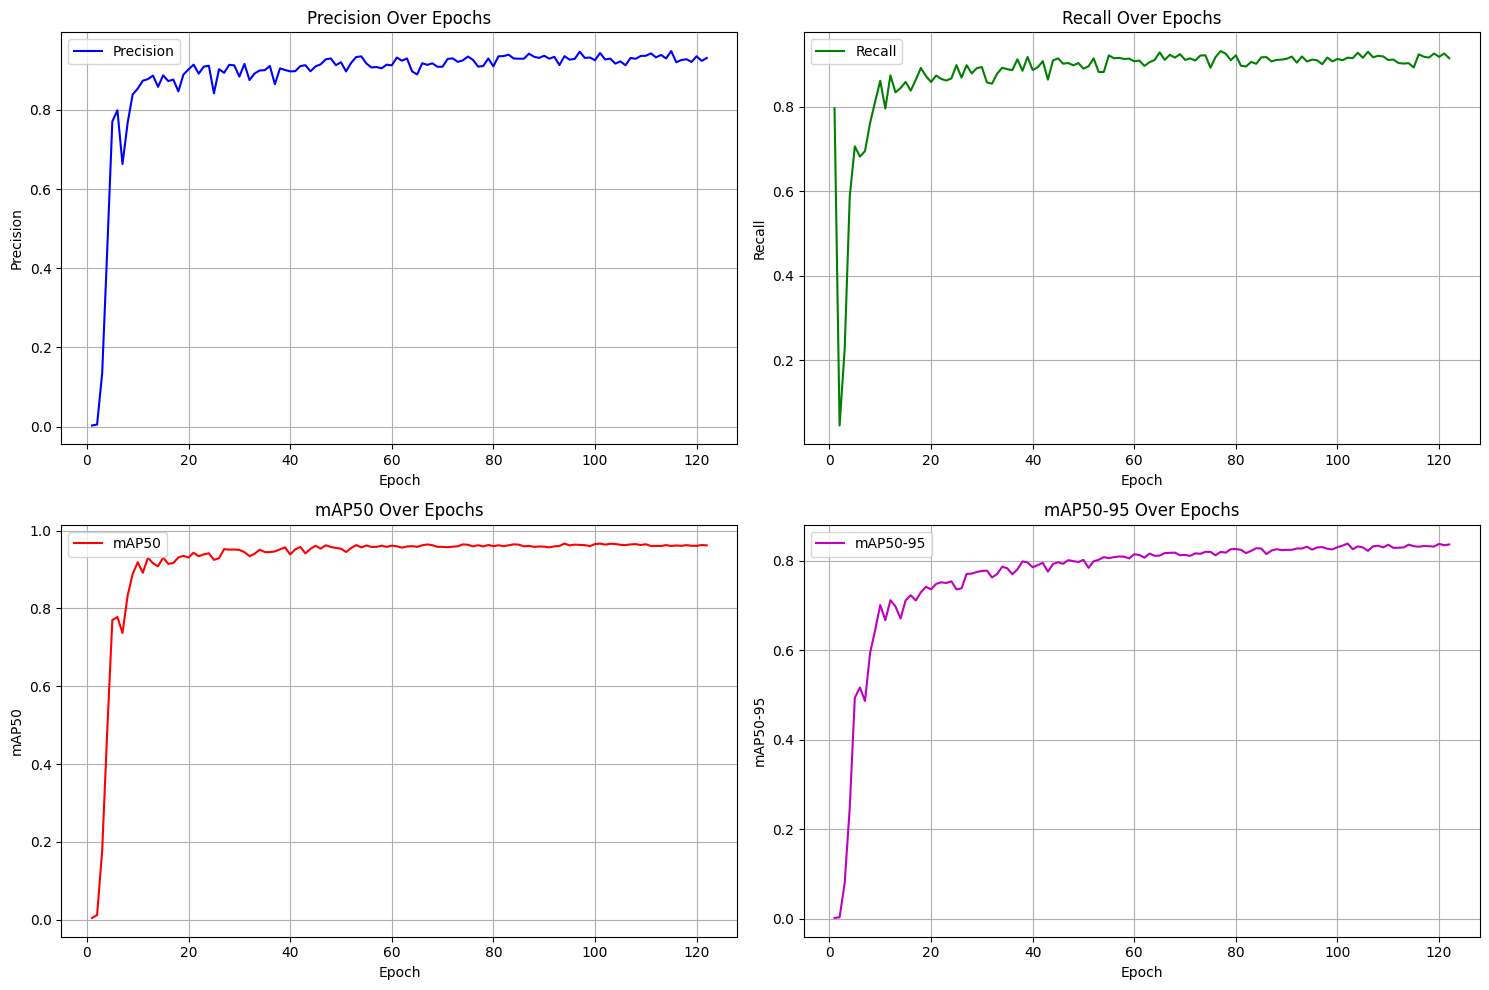

In [5]:
# Metrics Visualization

# Plot metrics over epochs
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision', color='b')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall', color='g')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50', color='r')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('mAP50 Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95', color='m')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Learning Rate Analysis
Plot the learning rate schedules and analyze their relationship with model performance.

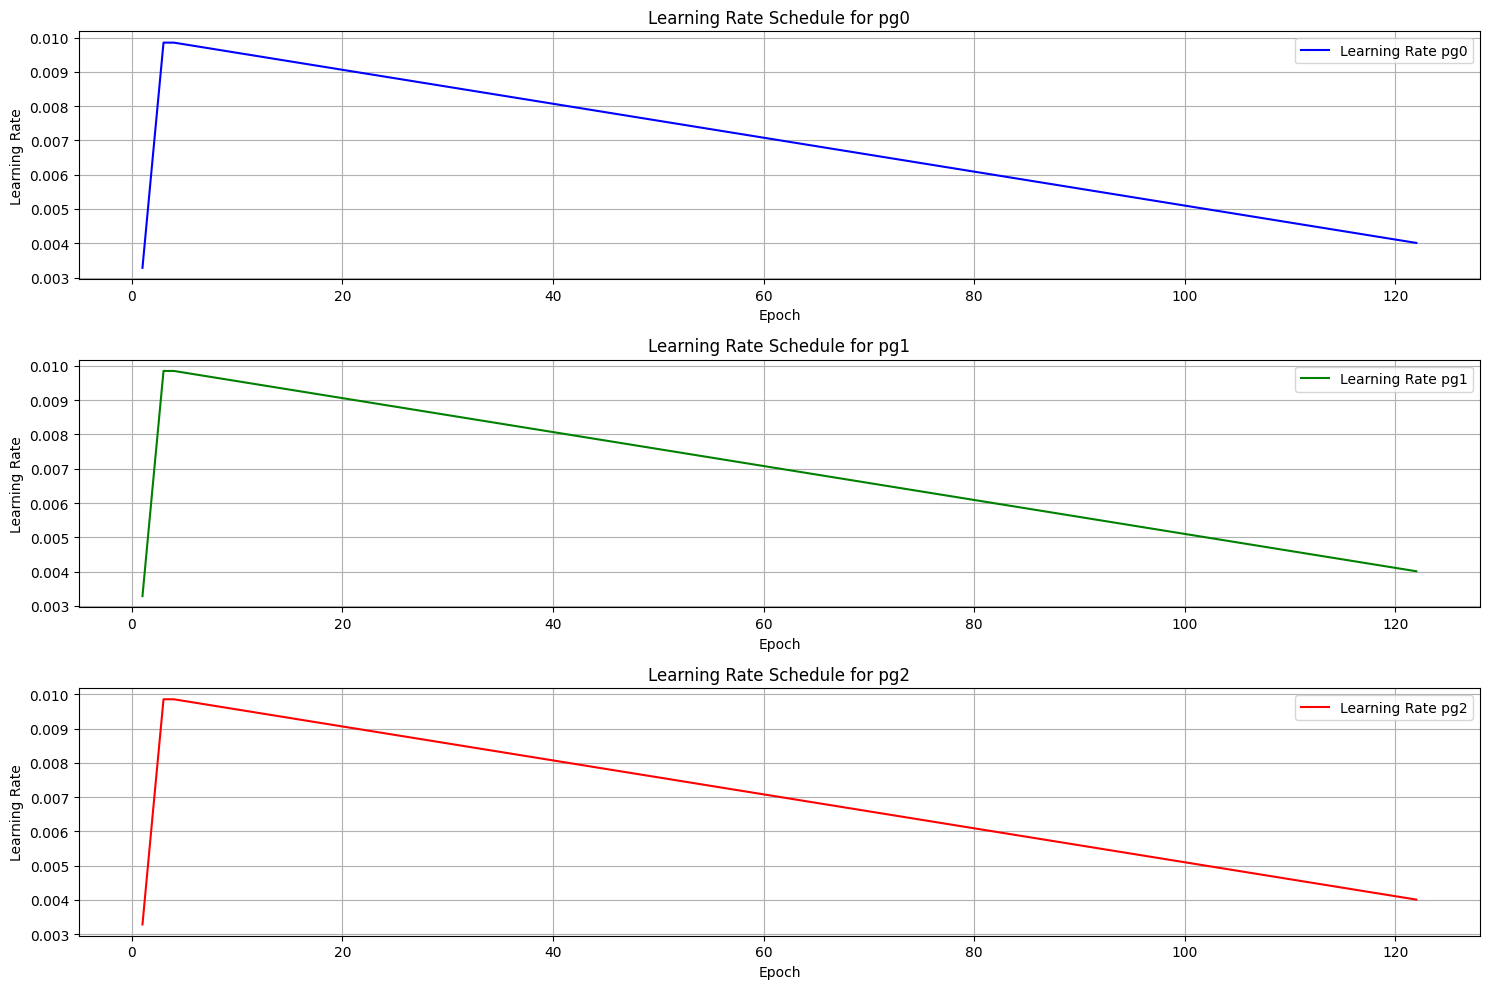

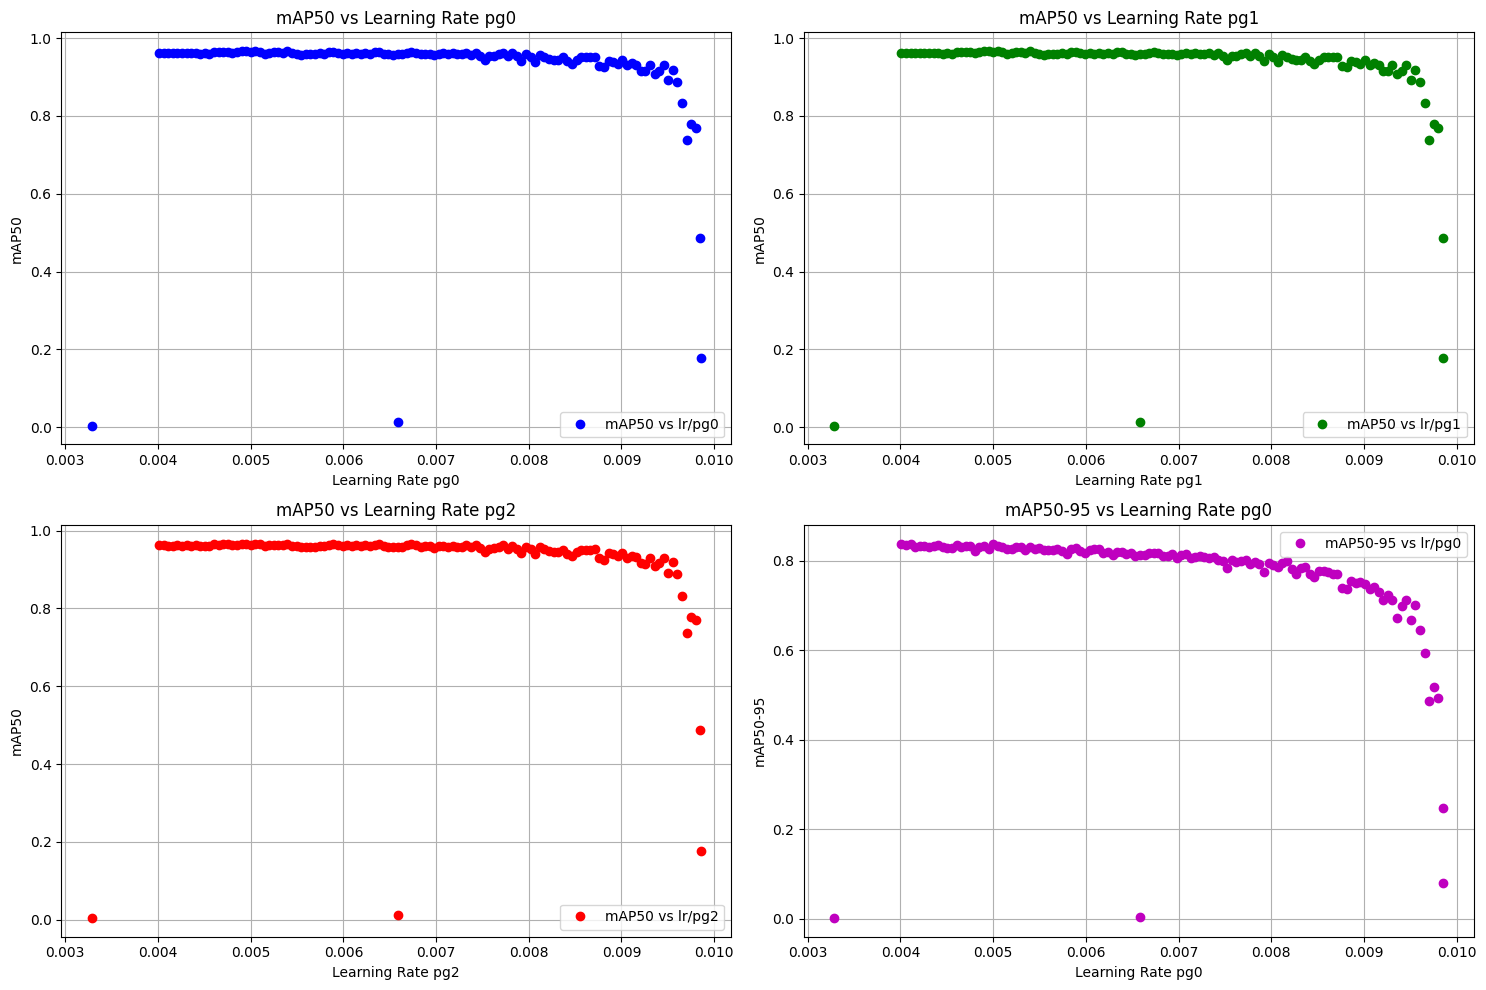

In [6]:
# Learning Rate Analysis

# Plot learning rate schedules
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(results_df['epoch'], results_df['lr/pg0'], label='Learning Rate pg0', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule for pg0')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(results_df['epoch'], results_df['lr/pg1'], label='Learning Rate pg1', color='g')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule for pg1')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(results_df['epoch'], results_df['lr/pg2'], label='Learning Rate pg2', color='r')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule for pg2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze the relationship between learning rates and model performance
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(results_df['lr/pg0'], results_df['metrics/mAP50(B)'], 'o', label='mAP50 vs lr/pg0', color='b')
plt.xlabel('Learning Rate pg0')
plt.ylabel('mAP50')
plt.title('mAP50 vs Learning Rate pg0')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_df['lr/pg1'], results_df['metrics/mAP50(B)'], 'o', label='mAP50 vs lr/pg1', color='g')
plt.xlabel('Learning Rate pg1')
plt.ylabel('mAP50')
plt.title('mAP50 vs Learning Rate pg1')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_df['lr/pg2'], results_df['metrics/mAP50(B)'], 'o', label='mAP50 vs lr/pg2', color='r')
plt.xlabel('Learning Rate pg2')
plt.ylabel('mAP50')
plt.title('mAP50 vs Learning Rate pg2')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_df['lr/pg0'], results_df['metrics/mAP50-95(B)'], 'o', label='mAP50-95 vs lr/pg0', color='m')
plt.xlabel('Learning Rate pg0')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 vs Learning Rate pg0')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Model Convergence Analysis
Determine when the model converges by analyzing the stabilization of losses and metrics, and identify potential overfitting.

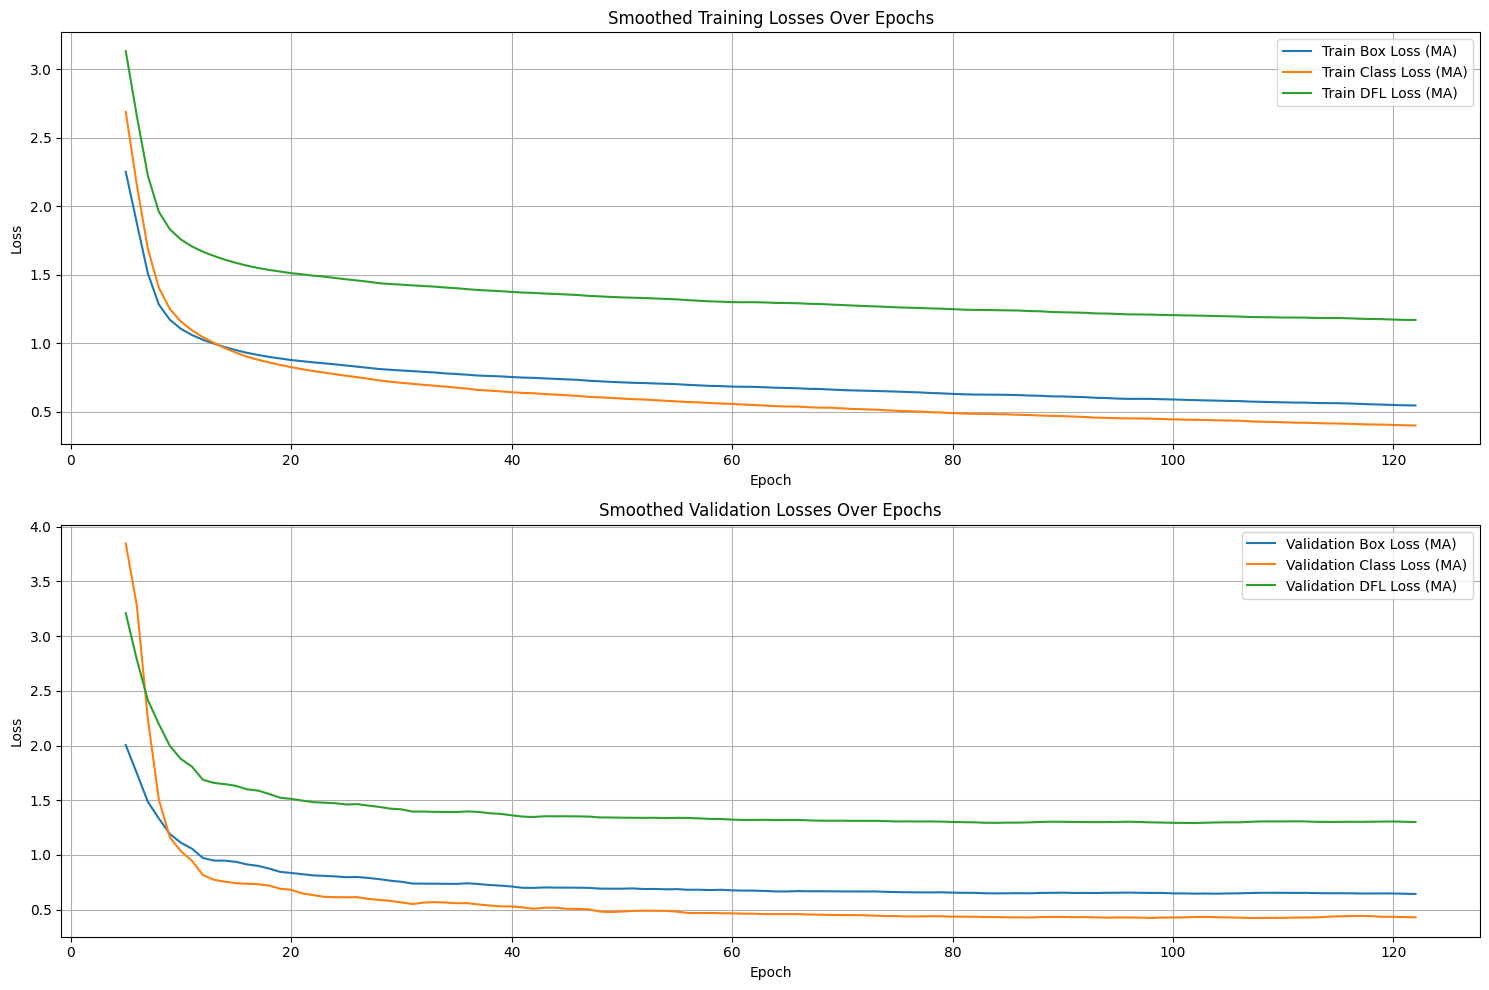

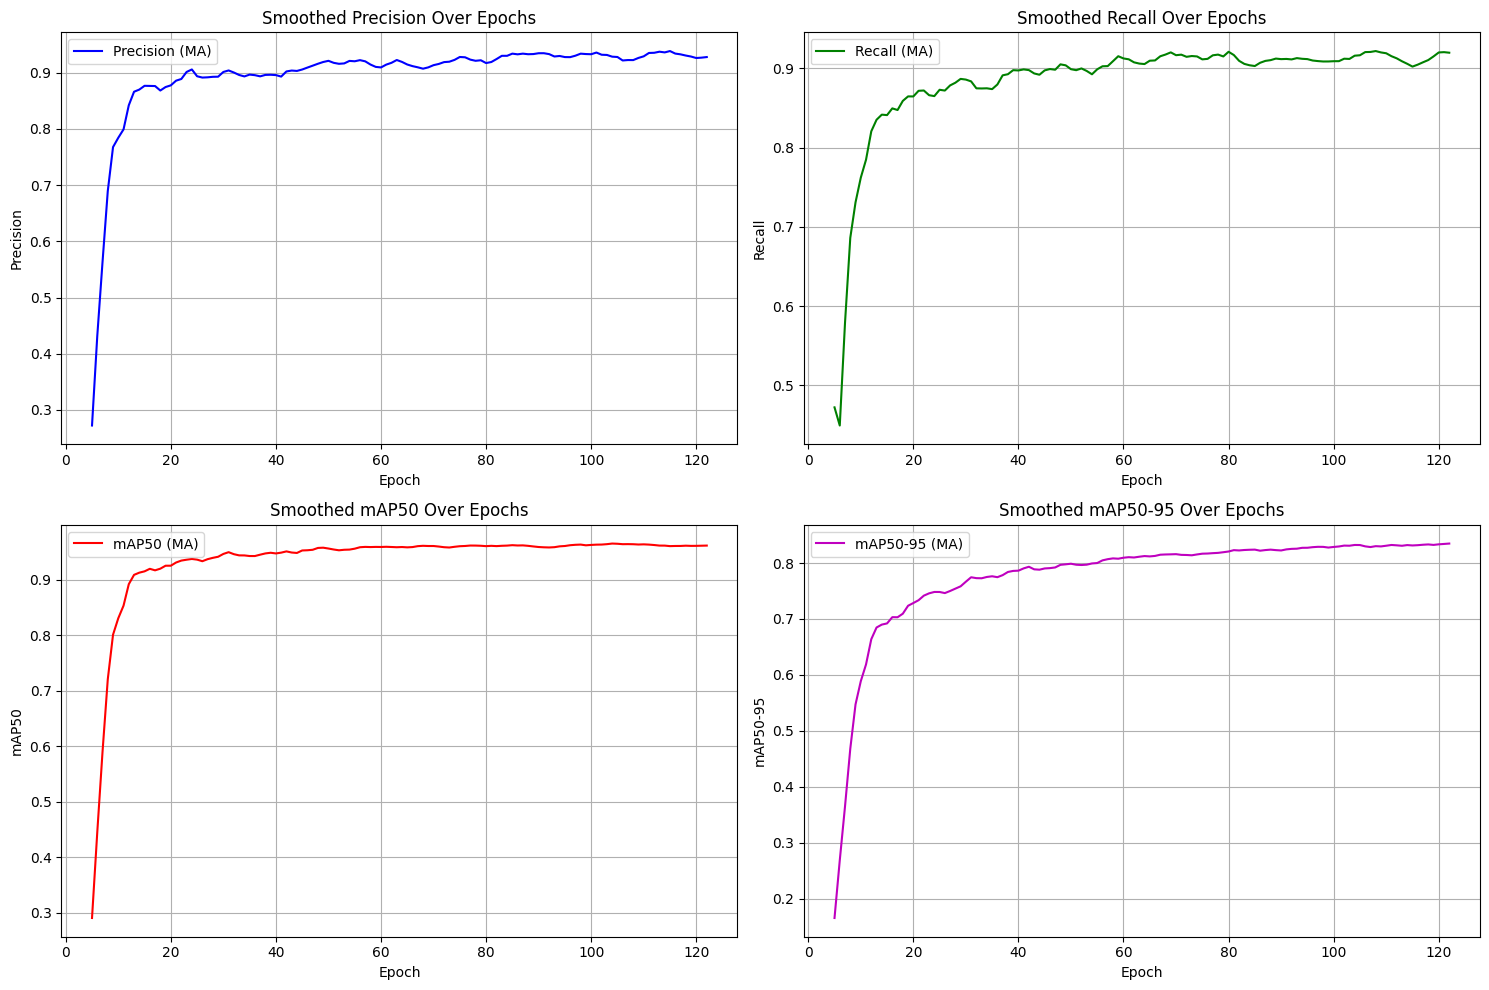

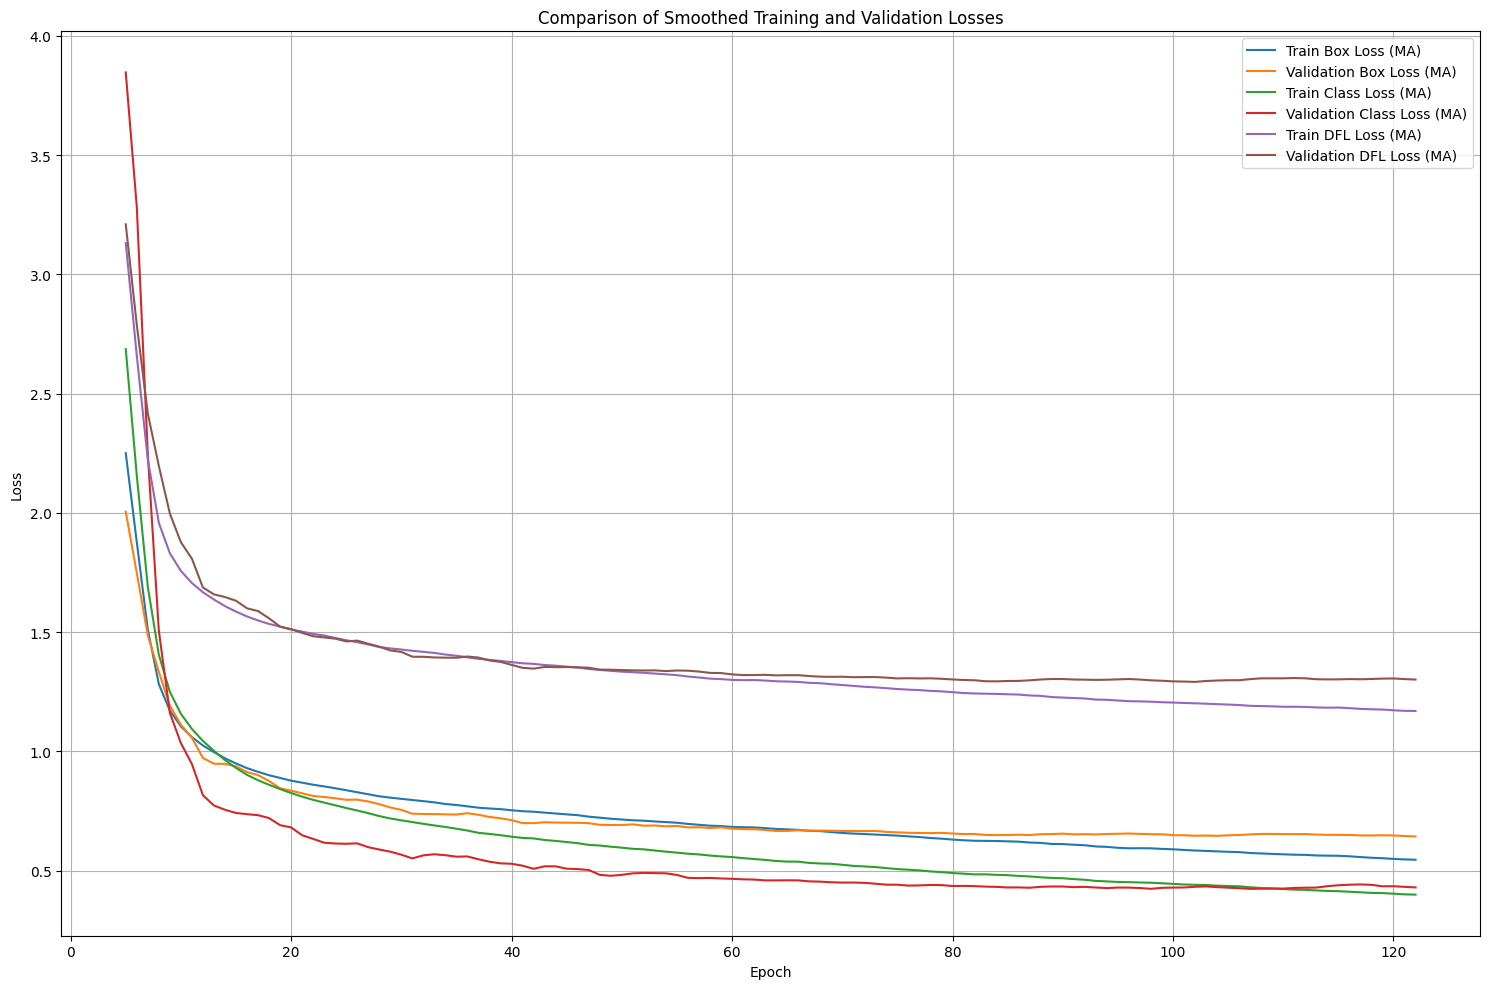

In [7]:
# Model Convergence Analysis

# Calculate the moving average of losses and metrics to smooth out the curves
results_df['train/box_loss_ma'] = results_df['train/box_loss'].rolling(window=5).mean()
results_df['train/cls_loss_ma'] = results_df['train/cls_loss'].rolling(window=5).mean()
results_df['train/dfl_loss_ma'] = results_df['train/dfl_loss'].rolling(window=5).mean()
results_df['val/box_loss_ma'] = results_df['val/box_loss'].rolling(window=5).mean()
results_df['val/cls_loss_ma'] = results_df['val/cls_loss'].rolling(window=5).mean()
results_df['val/dfl_loss_ma'] = results_df['val/dfl_loss'].rolling(window=5).mean()
results_df['metrics/precision_ma'] = results_df['metrics/precision(B)'].rolling(window=5).mean()
results_df['metrics/recall_ma'] = results_df['metrics/recall(B)'].rolling(window=5).mean()
results_df['metrics/mAP50_ma'] = results_df['metrics/mAP50(B)'].rolling(window=5).mean()
results_df['metrics/mAP50-95_ma'] = results_df['metrics/mAP50-95(B)'].rolling(window=5).mean()

# Plot smoothed training and validation losses to identify convergence
plt.figure(figsize=(15, 10))

# Smoothed training losses
plt.subplot(2, 1, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss_ma'], label='Train Box Loss (MA)')
plt.plot(results_df['epoch'], results_df['train/cls_loss_ma'], label='Train Class Loss (MA)')
plt.plot(results_df['epoch'], results_df['train/dfl_loss_ma'], label='Train DFL Loss (MA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Smoothed Training Losses Over Epochs')
plt.legend()
plt.grid(True)

# Smoothed validation losses
plt.subplot(2, 1, 2)
plt.plot(results_df['epoch'], results_df['val/box_loss_ma'], label='Validation Box Loss (MA)')
plt.plot(results_df['epoch'], results_df['val/cls_loss_ma'], label='Validation Class Loss (MA)')
plt.plot(results_df['epoch'], results_df['val/dfl_loss_ma'], label='Validation DFL Loss (MA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Smoothed Validation Losses Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot smoothed metrics to identify convergence and potential overfitting
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(results_df['epoch'], results_df['metrics/precision_ma'], label='Precision (MA)', color='b')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Smoothed Precision Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/recall_ma'], label='Recall (MA)', color='g')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Smoothed Recall Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_df['epoch'], results_df['metrics/mAP50_ma'], label='mAP50 (MA)', color='r')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('Smoothed mAP50 Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95_ma'], label='mAP50-95 (MA)', color='m')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.title('Smoothed mAP50-95 Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Identify potential overfitting by comparing training and validation losses
plt.figure(figsize=(15, 10))

plt.plot(results_df['epoch'], results_df['train/box_loss_ma'], label='Train Box Loss (MA)')
plt.plot(results_df['epoch'], results_df['val/box_loss_ma'], label='Validation Box Loss (MA)')
plt.plot(results_df['epoch'], results_df['train/cls_loss_ma'], label='Train Class Loss (MA)')
plt.plot(results_df['epoch'], results_df['val/cls_loss_ma'], label='Validation Class Loss (MA)')
plt.plot(results_df['epoch'], results_df['train/dfl_loss_ma'], label='Train DFL Loss (MA)')
plt.plot(results_df['epoch'], results_df['val/dfl_loss_ma'], label='Validation DFL Loss (MA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of Smoothed Training and Validation Losses')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Performance Comparisons
Compare training vs. validation metrics to evaluate model generalization and identify optimal training epochs.

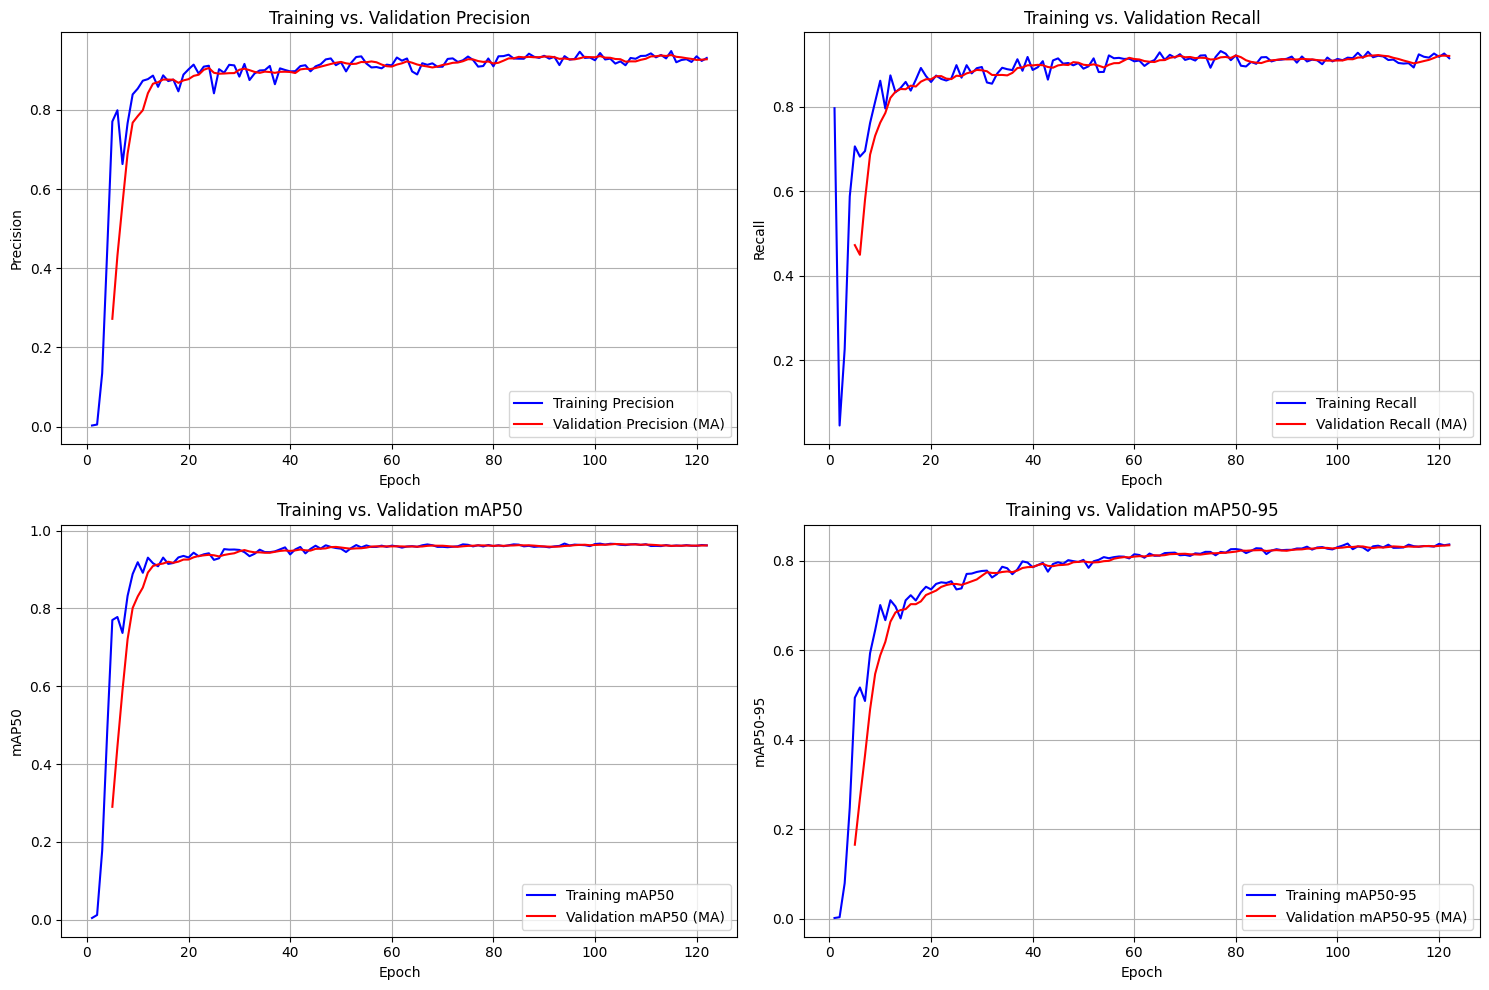

Optimal training epoch based on highest validation mAP50: 104.0


In [8]:
# Performance Comparisons

# Compare training vs. validation metrics to evaluate model generalization and identify optimal training epochs

# Plot training vs. validation precision
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Training Precision', color='b')
plt.plot(results_df['epoch'], results_df['metrics/precision_ma'], label='Validation Precision (MA)', color='r')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training vs. Validation Precision')
plt.legend()
plt.grid(True)

# Plot training vs. validation recall
plt.subplot(2, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Training Recall', color='b')
plt.plot(results_df['epoch'], results_df['metrics/recall_ma'], label='Validation Recall (MA)', color='r')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training vs. Validation Recall')
plt.legend()
plt.grid(True)

# Plot training vs. validation mAP50
plt.subplot(2, 2, 3)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='Training mAP50', color='b')
plt.plot(results_df['epoch'], results_df['metrics/mAP50_ma'], label='Validation mAP50 (MA)', color='r')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('Training vs. Validation mAP50')
plt.legend()
plt.grid(True)

# Plot training vs. validation mAP50-95
plt.subplot(2, 2, 4)
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='Training mAP50-95', color='b')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95_ma'], label='Validation mAP50-95 (MA)', color='r')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.title('Training vs. Validation mAP50-95')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Identify optimal training epochs by finding the epoch with the highest validation mAP50
optimal_epoch = results_df.loc[results_df['metrics/mAP50_ma'].idxmax()]['epoch']
print(f'Optimal training epoch based on highest validation mAP50: {optimal_epoch}')